In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carrizo springs
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | mubende
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | chibougamau
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | trenggalek
Processing Record 8 of Set 1 | sinop
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | kalmunai
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | sur
Processing Record 14 of Set 1 | windermere
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | brookings
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | big bend
Processing Record 21 of Set 1 | puerto baquerizo moreno
Processing Reco

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carrizo springs,28.5219,-99.8606,277.49,41,100,1.54,US,1705825296
1,port-aux-francais,-49.3500,70.2167,280.23,83,75,9.01,TF,1705825297
2,mubende,0.5606,31.3900,301.91,23,64,2.69,UG,1705825297
3,port mathurin,-19.6833,63.4167,301.06,78,13,3.54,MU,1705825297
4,chibougamau,49.9168,-74.3659,253.94,84,100,4.12,CA,1705825298


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/csv_1.csv", index_label="City_ID")
city_data_df = pd.read_csv("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/csv_1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carrizo springs,28.5219,-99.8606,277.49,41,100,1.54,US,1705825296
1,port-aux-francais,-49.3500,70.2167,280.23,83,75,9.01,TF,1705825297
2,mubende,0.5606,31.3900,301.91,23,64,2.69,UG,1705825297
3,port mathurin,-19.6833,63.4167,301.06,78,13,3.54,MU,1705825297
4,chibougamau,49.9168,-74.3659,253.94,84,100,4.12,CA,1705825298


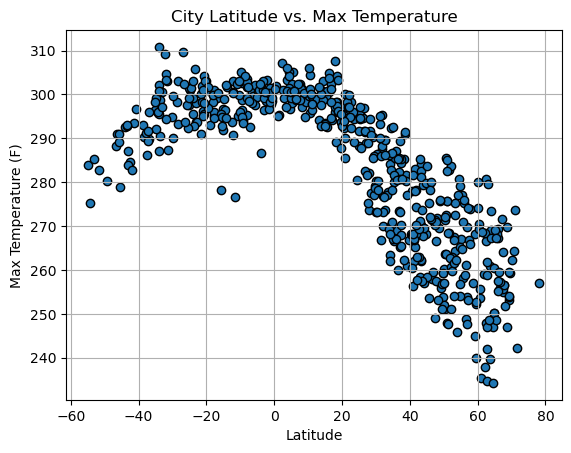

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/Fig1.png")

# Show the plot
plt.show()

In [14]:
import plotly.express as px

# Build the scatter plots for latitude vs. humidity
fig = px.scatter(city_data_df, x='Lat', y='Humidity', title='City Latitude vs. Humidity')

# Add gridlines
fig.update_layout(xaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'))

# Save the figure
fig.write_html("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/Fig2.html")

# Show the plot
fig.show()

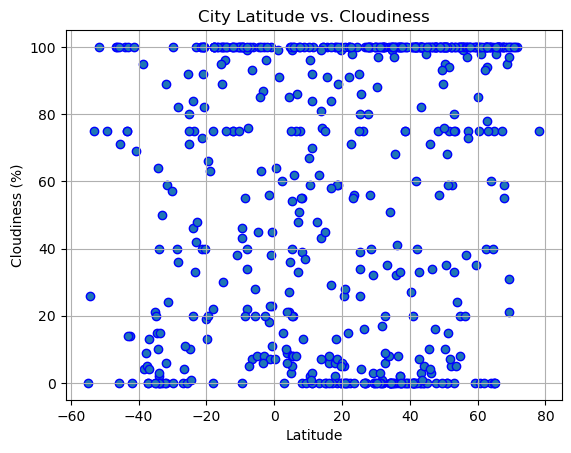

In [15]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/Fig3.png")

# Show the plot
plt.show()

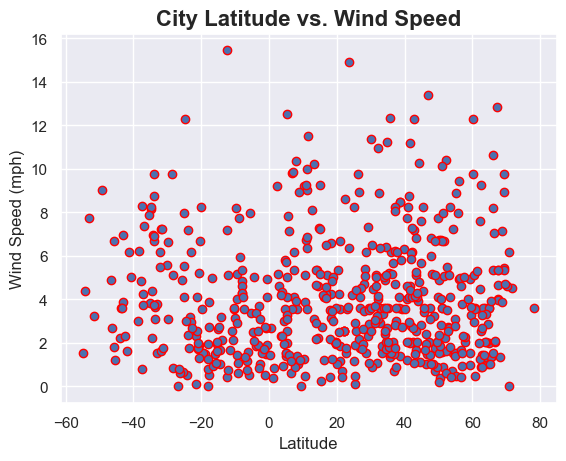

In [17]:
import seaborn as sns

# Set the style of the plot
sns.set(style="darkgrid")

# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", edgecolors="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=16, fontweight='bold')
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("/Users/Masih/Desktop/bootcamp /Challenges/python-api-challenge/WeatherPy./Starter_Code/Fig4.png")

# Show the plot
plt.show()

In [18]:
from scipy.stats import linregress

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the regression results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)

Slope: 2.0
Intercept: 0.0
R-value: 1.0
P-value: 1.2004217548761408e-30
Standard Error: 0.0


In [19]:
from scipy.stats import linregress
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carrizo springs,28.5219,-99.8606,277.49,41,100,1.54,US,1705825296
2,mubende,0.5606,31.3900,301.91,23,64,2.69,UG,1705825297
4,chibougamau,49.9168,-74.3659,253.94,84,100,4.12,CA,1705825298
7,sinop,41.7711,34.8709,274.31,99,100,2.78,TR,1705825299
9,kalmunai,7.4167,81.8167,301.22,71,51,5.33,LK,1705825300


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,280.23,83,75,9.01,TF,1705825297
3,port mathurin,-19.6833,63.4167,301.06,78,13,3.54,MU,1705825297
5,carnarvon,-24.8667,113.6333,301.04,64,10,12.29,AU,1705824700
6,trenggalek,-8.0500,111.7167,303.46,65,22,4.29,ID,1705825298
8,broken hill,-31.9500,141.4333,304.75,21,0,7.24,AU,1705825299


In [23]:
# Linear regression on Northern Hemisphere
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Print the regression results
print("R-value:", r_value)


Slope: -0.7793380138581457
Intercept: 306.9245500650001
R-value: -0.8610101829079022
P-value: 2.1298753218062577e-125
Standard Error: 0.022462536399371742


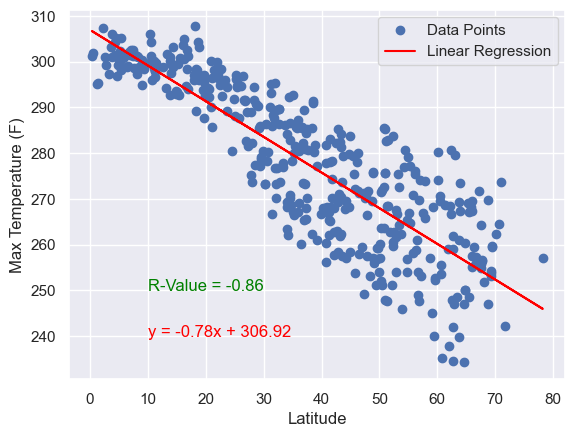

In [46]:


# Generate a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Add legend
plt.legend()
plt.text(10, 240, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(10, 250, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

In [49]:
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Print the regression results
print("R-value:", r_value)


R-value: 0.48864228024413325


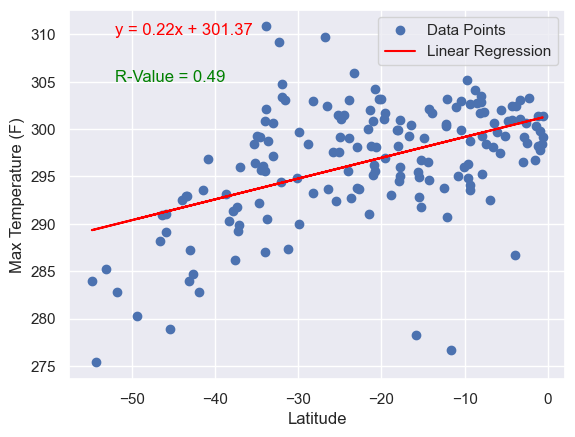

In [54]:
# Linear regression on Southern Hemisphere
# Generate a scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Add legend
plt.legend()
plt.text(-52, 310, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(-52, 305, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

R-value: 0.4166992306961222


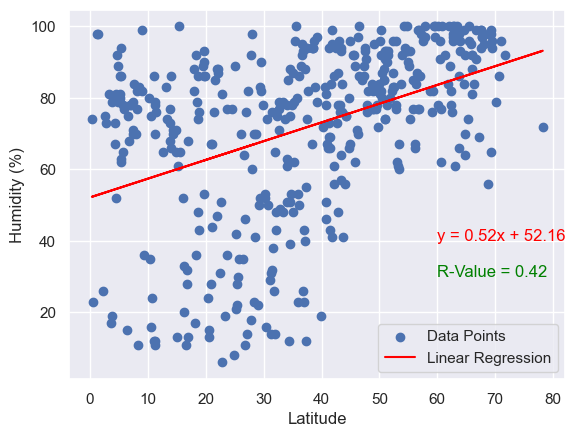

In [60]:

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Add legend
plt.legend()
plt.text(60, 40, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(60, 30, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

R-value: 0.2040212782225638


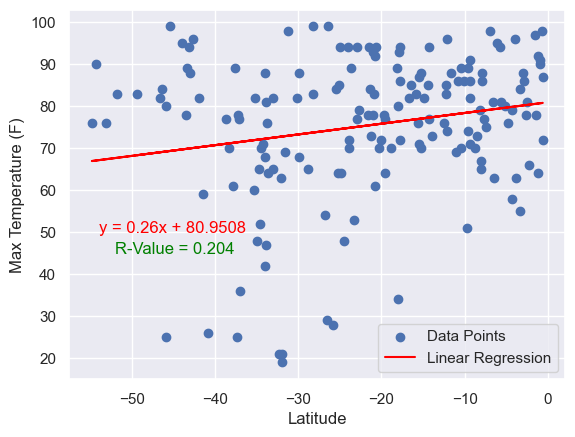

In [69]:
# Linear regression on Southern Hemisphere
# Generate a scatter plot
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Add legend
plt.legend()
plt.text(-54, 50, f"y = {round(slope, 2)}x + {round(intercept, 4)}", color='red')
plt.text(-52, 45, f"R-Value = {round(r_value, 4)}", color='green')
# Display the plot
plt.show()

In [71]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carrizo springs,28.5219,-99.8606,277.49,41,100,1.54,US,1705825296
2,mubende,0.5606,31.3900,301.91,23,64,2.69,UG,1705825297
4,chibougamau,49.9168,-74.3659,253.94,84,100,4.12,CA,1705825298
7,sinop,41.7711,34.8709,274.31,99,100,2.78,TR,1705825299
9,kalmunai,7.4167,81.8167,301.22,71,51,5.33,LK,1705825300


R-value: 0.27446492536826994


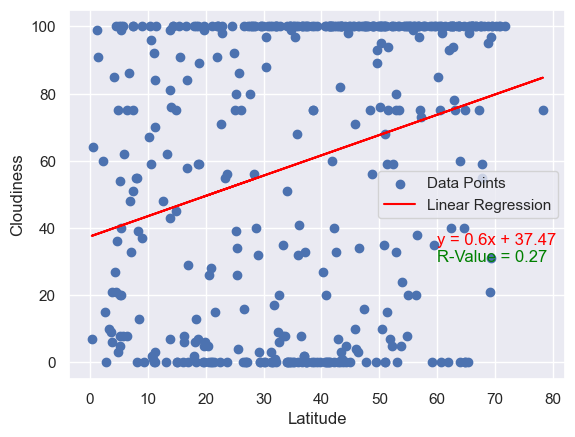

In [73]:
# Northern Hemisphere

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Add legend
plt.legend()
plt.text(60, 35, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(60, 30, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

R-value: 0.2080592937343551


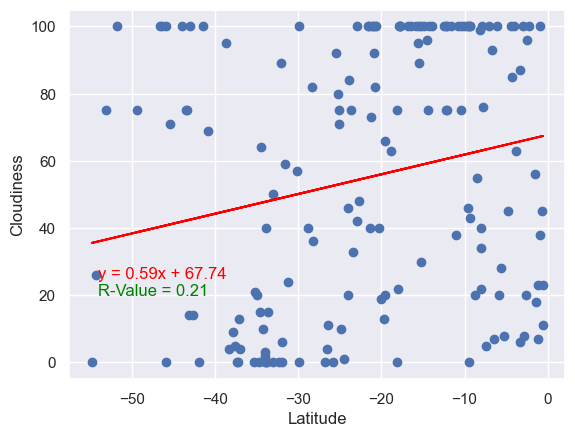

In [75]:
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(-54, 25, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(-54, 20, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()

R-value: -0.027935267101614304


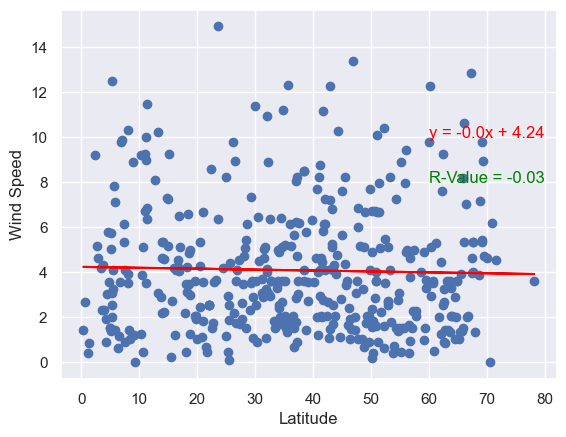

In [76]:
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print("R-value:", r_value)

# Generate a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(60, 10, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(60, 8, f"R-Value = {round(r_value, 2)}", color='green')
# Display the plot
plt.show()